In [3]:
import matplotlib.pyplot as pl
import numpy as np

import MulensModel
from MulensModel.model import Model

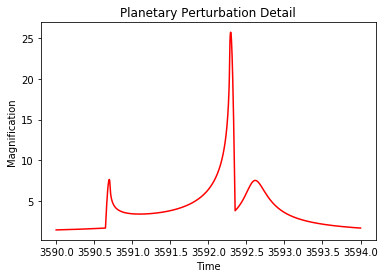

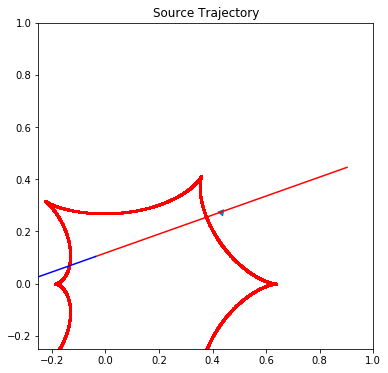

In [2]:
# Create a PSPL model
t_0 = 3592.
u_0 = -0.11
t_E = 3.

#pspl = Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E})

# Create a planet model with same PSPL parameters
s = 1.2
q = 0.25
alpha = 200.0
rho = 0.01

planet = Model(
    {'t_0': t_0, 'u_0': u_0, 't_E': t_E, 's': s, 'q': q, 'alpha': alpha,
     'rho': rho})
planet.set_magnification_methods([3589., 'VBBL', 3595.])

# Plot PSPL model
# pl.figure()
# pspl.plot_magnification()
# pl.title('A Point Lens Model')

# Plot PSPL model in magnitudes with arbitrary blending
# pl.figure()
# pspl.plot_lc(f_source=1.0, f_blend=0.0, label='fs=1.0, fb=0.0')
# pspl.plot_lc(f_source=0.5, f_blend=0.5, label='fs=0.5, fb=0.5')
# pl.legend(loc='best')
# pl.title('A Point Lens Model in Magnitudes')

# Plot planet and PSPL models and show difference in magnification at
# planet perturbation
# pl.figure()
# pspl.plot_magnification(
#     color='blue', linestyle=':', zorder=1, label='Point Lens')
# planet.plot_magnification(
#     color='red', linestyle='-', zorder=2, label='Planet')
# pl.title('Planet vs. Point Lens Models')
# pl.legend(loc='best')

# Plot detail of the planet perturbation
pl.figure()
planet.plot_magnification(
    t_range=[3590, 3594], color='red', linestyle='-', zorder=2, label='Planet')
pl.title('Planetary Perturbation Detail')

# Plot source trajectory and caustic
pl.figure(figsize=(6, 6))
planet.plot_trajectory(t_range=[t_0 - t_E, t_0], caustics=True, color='red')
planet.plot_trajectory(t_range=[t_0, t_0 + t_E], caustics=True, color='blue')
pl.xlim(-0.25, 1.0)
pl.ylim(-0.25, 1.0)
pl.title('Source Trajectory')

pl.show()

The Lens-Source system WITHOUT proper motion specified:
------
Lens Distance: 7000.0 pc
Lens Total Mass: 1.0 solMass
Source Distance: 8000.0 pc
theta_E = 0.3813475466948558 mas
------
------
The Lens-Source system WITH proper motion specified:
------
Lens Distance: 7000.0 pc
Lens Total Mass: 1.0 solMass
Source Distance: 8000.0 pc
theta_E = 0.3813475466948558 mas
mu_rel = 4.0 mas / yr
t_E = 34.82179785757402 d
------


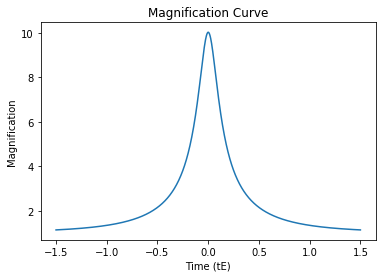

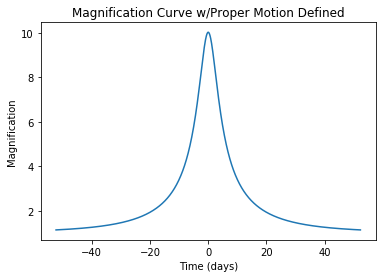

In [11]:
import astropy.units as u
import matplotlib.pyplot as pl

from MulensModel.mulensobjects.lens import Lens
from MulensModel.mulensobjects.source import Source
from MulensModel.mulensobjects.mulenssystem import MulensSystem


# Define a Lens star
my_lens = Lens(mass=1*u.solMass, distance=7.e3*u.pc)

# Define a Source Star
my_source = Source(distance=8.e3*u.pc)

# Combine them into a lens system
point_lens = MulensSystem(lens=my_lens, source=my_source)
print('The Lens-Source system WITHOUT proper motion specified:')
print(point_lens)

pl.figure()
point_lens.plot_magnification(u_0=0.1)
pl.title('Magnification Curve')

# Give the objects a relative proper motion
point_lens.mu_rel = 4. * u.mas / u.yr
print('------\nThe Lens-Source system WITH proper motion specified:')
print(point_lens)

pl.figure()
point_lens.plot_magnification(u_0=0.1)
pl.title('Magnification Curve w/Proper Motion Defined')

pl.show()